In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [4]:
# Lendo os dados
df = pd.read_csv('transactional_sample.csv')

In [65]:
# Informações dos atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2369 entries, 0 to 2920
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      2369 non-null   int64         
 1   merchant_id         2369 non-null   int64         
 2   user_id             2369 non-null   int64         
 3   card_number         2369 non-null   object        
 4   transaction_date    2369 non-null   object        
 5   transaction_amount  2369 non-null   float64       
 6   device_id           2369 non-null   float64       
 7   has_cbk             2369 non-null   float64       
 8   time                2369 non-null   datetime64[ns]
 9   date                2369 non-null   object        
 10  hour                2369 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 286.6+ KB


In [6]:
# Verificando algumas linhas
df.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,False


In [55]:
df.columns

Index(['transaction_id', 'merchant_id', 'user_id', 'card_number',
       'transaction_date', 'transaction_amount', 'device_id', 'has_cbk'],
      dtype='object')

In [7]:
# Verificando os valores vazios
df.isna().sum()

transaction_id          0
merchant_id             0
user_id                 0
card_number             0
transaction_date        0
transaction_amount      0
device_id             830
has_cbk                 0
dtype: int64

In [8]:
# Eliminando os valores vazios
df.dropna(inplace=True)

In [58]:
# Transformando o has_cbk em número
df.loc[df['has_cbk'] == True, 'has_cbk'] = 1
df.loc[df['has_cbk'] == False, 'has_cbk'] = 0

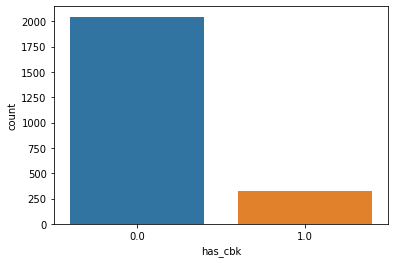

In [59]:
# Verificando a coluna has_cbk (são transações com chargebacks fraudulentos)
df['has_cbk'].value_counts()
sns.countplot(data = df, x='has_cbk')

In [60]:
# Explorando as correlações com has_cbk
df.corr()['has_cbk'].sort_values(ascending=False)

has_cbk               1.000000
transaction_amount    0.308509
user_id               0.022877
device_id            -0.045825
merchant_id          -0.055553
transaction_id       -0.146741
Name: has_cbk, dtype: float64

In [77]:
# Transformando os valores do transaction_date
df['time'] = pd.to_datetime(df['transaction_date'])
df['date'] = df.time.dt.date
df['hour'] = df.time.dt.hour

In [82]:
# Observar que a coluna time, date e hour foram acrescentadas
df.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,time,date,hour
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,0.0,2019-12-01 23:16:32.812632,20191201.0,23
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,1.0,2019-12-01 22:45:37.873639,20191201.0,22
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,0.0,2019-12-01 21:30:53.347051,20191201.0,21
5,21320403,59566,40759,516292******8220,2019-12-01T21:25:53.374213,60.49,192705.0,0.0,2019-12-01 21:25:53.374213,20191201.0,21
6,21320404,20917,25661,650485******9310,2019-12-01T21:25:19.532243,318.37,760932.0,0.0,2019-12-01 21:25:19.532243,20191201.0,21


**Pré-Processamento dos dados**

In [25]:
# Codifica variáveis fictícias para todo o conjunto de dados
df_encoded = pd.get_dummies(df)

In [32]:
# Separando os dados para treinamento e teste da máquina preditiva
X = df_encoded.drop(['has_cbk'], axis=1)
y = df_encoded['has_cbk']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=7)

**Máquina preditiva de detecção de fraude**

In [30]:
# Construindo o model
model = RandomForestClassifier()

In [33]:
# Treinando o modelo
model = model.fit(X_train, y_train)

In [34]:
# Passando novos dados (dados de teste) para o modelo
y_predict = model.predict(X_val)

**Avaliando a máquina preditiva**

In [89]:
# Comparando gabarito e previsões da máquina
gabarito = pd.DataFrame({'Gabarito': y_val, 'Previsões_da_Máquina': y_predict})
gabarito

,Gabarito,Previsões_da_Máquina
283,False,False
1550,False,False
1769,False,False
1844,False,False
1555,False,False
...,...,...
1957,False,False
2143,False,False
383,False,False
2648,False,False


In [90]:
# gera um relatório de classificação
print('Classification metrics: \n', classification_report(y_val, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

       False       0.89      1.00      0.94       616
        True       0.92      0.23      0.37        95

    accuracy                           0.89       711
   macro avg       0.91      0.61      0.66       711
weighted avg       0.90      0.89      0.87       711

